# –†–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [494]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [495]:
df = pd.read_csv('SeoulBikeDdata.csv')

In [496]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 8760
Total number of columns in dataset = 14


In [497]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Seasons'] = label_encoder.fit_transform(df['Seasons'])
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])
df['Functioning Day'] = label_encoder.fit_transform(df['Functioning Day'])
df['Date'] = label_encoder.fit_transform(df['Date'])

In [498]:
df.drop('Temperature(¬∞C)', inplace=True, axis=1)
df.drop('Functioning Day', inplace=True, axis=1)
df.drop('Holiday', inplace=True, axis=1)
df.drop('Dew point temperature(¬∞C)', inplace=True, axis=1)
df.drop('Humidity(%)', inplace=True, axis=1)
df.drop('Visibility (10m)', inplace=True, axis=1)
df.drop('Wind speed (m/s)', inplace=True, axis=1)

In [499]:
df.head()

Date  Rented Bike Count  Hour  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0    11                254     0                      0.0           0.0   
1    11                204     1                      0.0           0.0   
2    11                173     2                      0.0           0.0   
3    11                107     3                      0.0           0.0   
4    11                 78     4                      0.0           0.0   

   Snowfall (cm)  Seasons  
0            0.0        3  
1            0.0        3  
2            0.0        3  
3            0.0        3  
4            0.0        3

In [500]:
target_col = "Hour"

In [501]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [502]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [503]:
# X_train = X_train.select_dtypes(exclude=['object'])
X_with_constant = sm.add_constant(X_train)
# X_with_constant = X_with_constant.select_dtypes(exclude=['object'])
model = sm.OLS(y_train, X_with_constant)

In [504]:
results = model.fit()
results.params

const                      7.088916
Date                      -0.001169
Rented Bike Count          0.004757
Solar Radiation (MJ/m2)    0.366815
Rainfall(mm)               0.471542
Snowfall (cm)              0.595159
Seasons                    0.643717
dtype: float64

In [505]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hour   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     245.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.56e-281
Time:                        02:00:26   Log-Likelihood:                -19865.
No. Observations:                6132   AIC:                         3.974e+04
Df Residuals:                    6125   BIC:                         3.979e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

1. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–¥–µ–ª–∏ Y = b0 + b1‚àôd1 + b2‚àôd2 + b3‚àôd3:



> Intercept = b0 = 2.7089

>b1 = 0.0441
>b2 = 0.1993
>b3 = 0.0069


2. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ R-squared = 0.906, –µ–≥–æ —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ Adj. R-squared = 0.903 - —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç 90% –≤–∞—Ä–∏–∞—Ü–∏–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π Y.


3. –ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏:

>—Ä–∞—Å—á–µ—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –§–∏—à–µ—Ä–∞: F-statistic = 434,5

>—Ä–∞—Å—á–µ—Ç–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ Prob (F-statistic) = 1.88e-69

>—Ç–∞–∫ –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏–µ Prob (F-statistic) < 0.05, —Ç–æ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ R-squared = 0 –ù–ï –ü–†–ò–ù–ò–ú–ê–ï–¢–°–Ø, —Ç.–µ. –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –ó–ù–ê–ß–ò–ú

4. –ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:

>—Ä–∞—Å—á–µ—Ç–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ P>|t| –¥–ª—è b0, b1, b2 –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 0.05 - —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∑–Ω–∞—á–∏–º—ã

>–æ–± —ç—Ç–æ–º –∂–µ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç —Ç–æ, —á—Ç–æ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ ([0.025; 0.975]) –Ω–µ –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è —Ç–æ—á–∫—É 0

>—Ä–∞—Å—á–µ—Ç–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ P>|t| –¥–ª—è b3 –ø—Ä–µ–≤—ã—à–∞–µ—Ç 0.05. –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è. b3 –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –∑–Ω–∞—á–∏–º—ã–º.
–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ - –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ—Ç —Ä–∞–≤–µ–Ω –Ω—É–ª—é, –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è - –Ω–µ —Ä–∞–≤–µ–Ω.

5. –∑–Ω–∞—á–µ–Ω–∏–µ t –¥–ª—è b3 –æ—á–µ–Ω—å –º–∞–ª–æ (—á–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ t, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å, —á—Ç–æ –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É).

–¢–∞–∫–∂–µ –≤ —Ç–∞–±–ª–∏—Ü–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –ø—Ä–æ—á–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ Std.Err. 

In [506]:
# X_test = X_test[X_train.columns]
# X_test = sm.add_constant(X_test)
Y_Train_transformed = label_encoder.fit_transform(y_train)
Y_Test_transformed = label_encoder.fit_transform(y_test)
X_test = sm.add_constant(X_test)

In [507]:
y_pred = results.predict(X_test)

In [508]:
residual = y_test - y_pred

# –ü—Ä–µ–¥–ø–æ—Å—ã–ª–∫–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
–ú–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –Ω–µ –¥–ª—è –ª—é–±—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –∞ —Ç–æ–ª—å–∫–æ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—Ç —Ä—è–¥—É —É—Å–ª–æ–≤–∏–π. –ò –ø—Ä–µ–∂–¥–µ, —á–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–µ —É—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ —ç—Ç–∏—Ö —É—Å–ª–æ–≤–∏–π. –í –∏–Ω–æ–º —Å–ª—É—á–∞–µ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –Ω–µ –±—É–¥–µ—Ç –∞–¥–µ–∫–≤–∞—Ç–Ω–∞ –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ, –∏ –µ–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –±—É–¥–µ—Ç –±–µ—Å—Å–º—ã—Å–ª–µ–Ω–Ω–æ.

# –ù–∞–ª–∏—á–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
–ü–µ—Ä–≤–∞—è –∏ —Å–∞–º–∞—è –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –ø—Ä–µ–¥–ø–æ—Å—ã–ª–∫–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏. –ü–æ–¥ —ç—Ç–∏–º —É—Å–ª–æ–≤–∏–µ–º –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç—Å—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏, –≤—ã–±–æ—Ä –∞–¥–µ–∫–≤–∞—Ç–Ω—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ –∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ª–∏—à–Ω–∏—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤. –ê —Ç–∞–∫–∂–µ –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö.

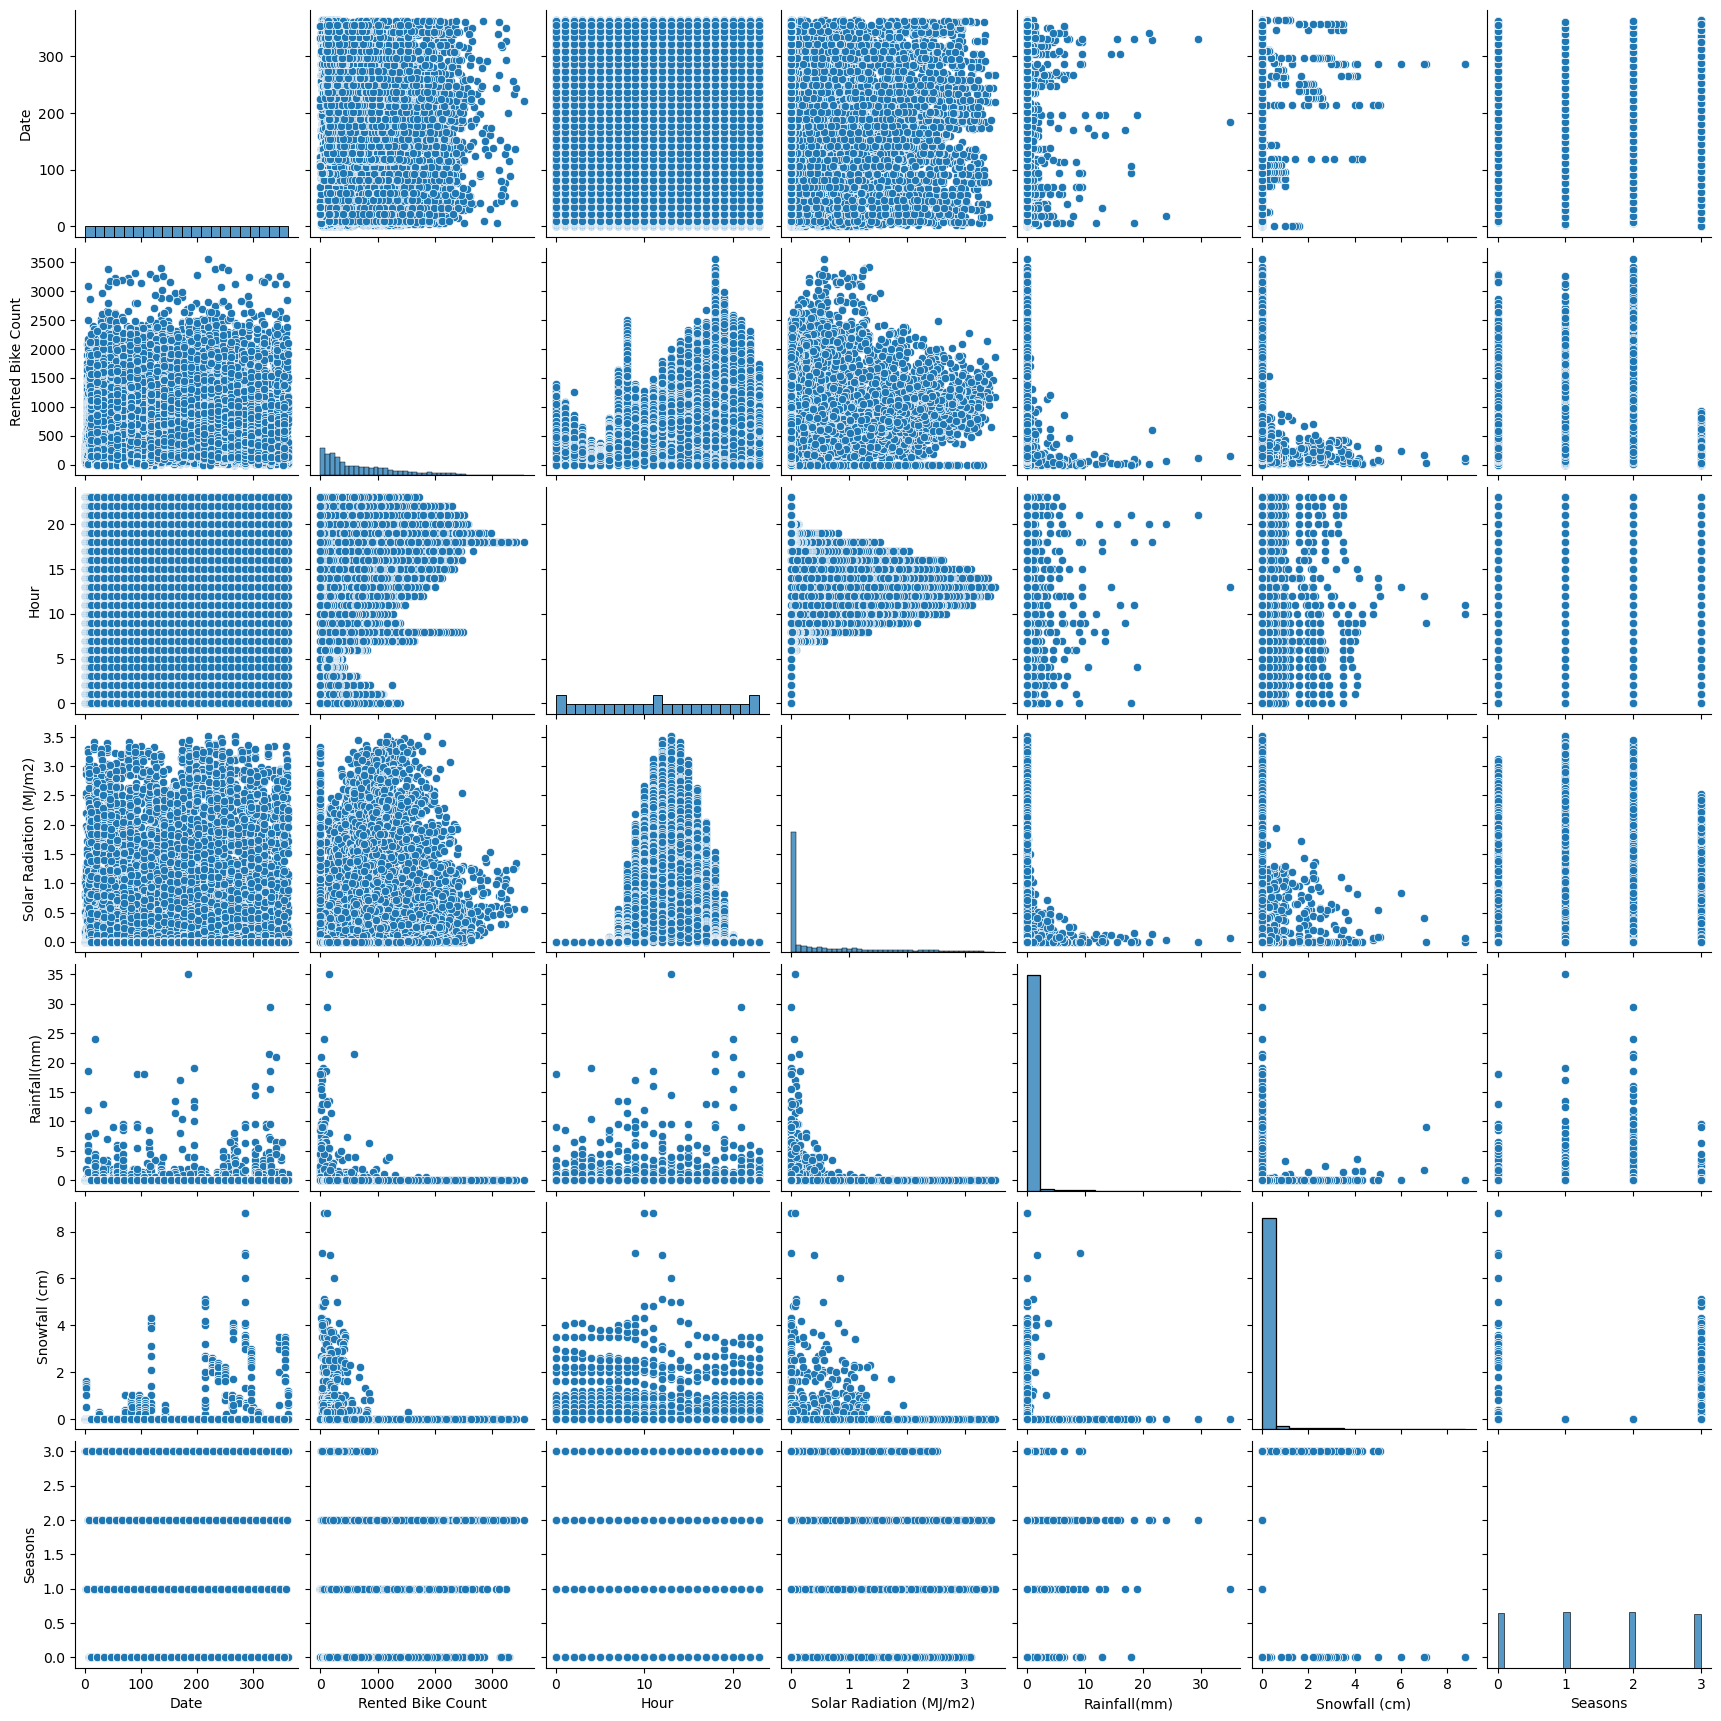

In [509]:
sns.pairplot(df)

# –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏

–ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å—é –Ω–∞–∑—ã–≤–∞—é—Ç —è–≤–ª–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –Ω–∞–ª–∏—á–∏–∏ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (–ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞–º–∏). –¢–∞–∫–æ–µ –º–æ–∂–µ—Ç –≤–æ–∑–Ω–∏–∫–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å—é: —Å—Ç–∞–∂ —Ä–∞–±–æ—Ç—ã –∏ –≤–æ–∑—Ä–∞—Å—Ç (–∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, —á–µ–º –±–æ–ª—å—à–µ –≤–æ–∑—Ä–∞—Å—Ç - —Ç–µ–º –±–æ–ª—å—à–µ —Å—Ç–∞–∂ –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç), –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ç—Å–∫–∏—Ö —Å–∞–¥–æ–≤ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∫–æ–ª –≤ —Ä–∞–π–æ–Ω–µ (–æ–±—ã—á–Ω–æ –¥–µ—Ç—Å–∫–∏–µ —Å–∞–¥—ã –±—ã–≤–∞—é—Ç –ø—Ä–∏ —à–∫–æ–ª–µ, —Ç–∞–∫ —á—Ç–æ —ç—Ç–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω—ã) –∏–ª–∏ –±–∞–ª–ª—ã –∑–∞ —ç–∫–∑–∞–º–µ–Ω—ã IELTS –∏ TOEFL (—Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ —ç–∫–∑–∞–º–µ–Ω—ã –ø—Ä–æ–≤–µ—Ä—è—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –∑–Ω–∞–Ω–∏—è –∏ –Ω–∞–≤—ã–∫–∏)

–ü–æ—Å–ª–µ–¥—Å—Ç–≤–∏–µ–º –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ —è–≤–ª—è–µ—Ç—Å—è —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤, –∏ –º–æ–¥–µ–ª—å –ø–æ–ª—É—á–∞–µ—Ç—Å—è –æ—á–µ–Ω—å –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ–π –∏ –º–µ–Ω—è—é—â–µ–π—Å—è –æ—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –¥–∞–∂–µ 1-2 –Ω–æ–≤—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π. –†–∞–∑—É–º–µ–µ—Ç—Å—è, —ç—Ç–æ –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∞—è –¥–ª—è –Ω–∞—Å —Å–∏—Ç—É–∞—Ü–∏—è, –ø–æ—ç—Ç–æ–º—É –º—ã –¥–æ–ª–∂–Ω—ã –æ—Ç–±–∏—Ä–∞—Ç—å –¥–ª—è –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ —Ç–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã, –º–µ–∂–¥—É –∫–æ—Ç–æ—Ä—ã–º–∏ –Ω–µ—Ç –ª–∏–Ω–µ–π–Ω–æ–π —Å–≤—è–∑–∏.

–î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—É—é –ø—Ä–µ–¥–ø–æ—Å—ã–ª–∫—É, –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –¥–ª—è –≤—Å–µ—Ö –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤, –∏ –æ—Ç—Å–ª–µ–¥–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ —Å–∏–ª—å–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Å–≤—è–∑–∏. –ù–µ—Ç —á–µ—Ç–∫–æ–π –≥—Ä–∞–Ω–∏—Ü—ã, –∫–æ—Ç–æ—Ä–∞—è –æ—Ç–¥–µ–ª—è–µ—Ç –¥–æ–ø—É—Å—Ç–∏–º—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –∏ –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º—É—é, –Ω–æ –≤ —Ä—è–¥–µ –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≥—Ä–∞–Ω–∏—Ü–∞ –≤ —Ä–∞–π–æ–Ω–µ 0.9. –¢–æ –µ—Å—Ç—å, –µ—Å–ª–∏ –º–µ–∂–¥—É –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞–º–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ –º–æ–¥—É–ª—é –±–æ–ª—å—à–µ, —á–µ–º 0.9, —Ç–æ –º—ã –Ω–µ –º–æ–∂–µ–º –æ–±–∞ —ç—Ç–∏—Ö –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –º–æ–¥–µ–ª–∏.

–ü–æ—á–∏—Ç–∞—Ç—å:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[—Å—Ç–∞—Ç—å—è](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [512]:
cols_num = ['Date','Rented Bike Count', 'Hour','Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)', 'Seasons']

correlation = df.corr().loc[cols_num, cols_num]
correlation

Date  Rented Bike Count          Hour  \
Date                     1.000000e+00           0.026532  2.083623e-16   
Rented Bike Count        2.653183e-02           1.000000  4.102573e-01   
Hour                     2.083623e-16           0.410257  1.000000e+00   
Solar Radiation (MJ/m2) -4.143462e-03           0.261837  1.451309e-01   
Rainfall(mm)            -1.125933e-03          -0.123074  8.714642e-03   
Snowfall (cm)            1.036623e-01          -0.141804 -2.151645e-02   
Seasons                 -1.745374e-02          -0.253058 -1.747965e-15   

                         Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
Date                                   -0.004143     -0.001126       0.103662   
Rented Bike Count                       0.261837     -0.123074      -0.141804   
Hour                                    0.145131      0.008715      -0.021516   
Solar Radiation (MJ/m2)                 1.000000     -0.074290      -0.072301   
Rainfall(mm)                           -0.074290      1.000000       0.008500   
Snowfall (cm)                          -0.072301      0.008500       1.000000   
Seasons                                -0.075812     -0.019296       0.145457   

                              Seasons  
Date                    -1.745374e-02  
Rented Bike Count       -2.530575e-01  
Hour                    -1.747965e-15  
Solar Radiation (MJ/m2) -7.581168e-02  
Rainfall(mm)            -1.929617e-02  
Snowfall (cm)            1.454573e-01  
Seasons                  1.000000e+00

<Axes: >

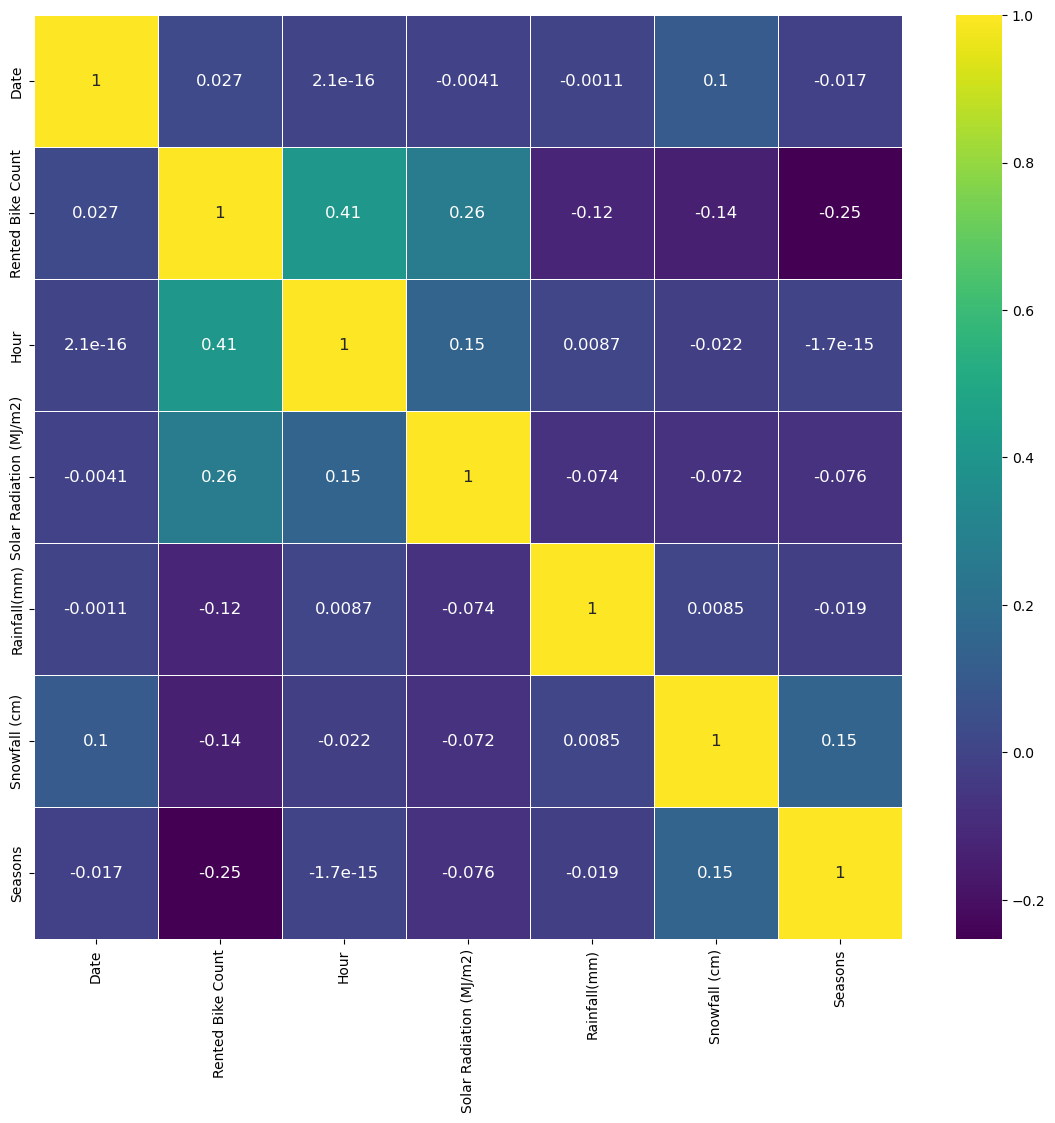

In [513]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

In [514]:
X_train.isnull().sum() 

Date                       0
Rented Bike Count          0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
dtype: int64

In [515]:
X_test.isnull().sum()

const                      0
Date                       0
Rented Bike Count          0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
dtype: int64

In [516]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

Date  Rented Bike Count  Solar Radiation (MJ/m2)  Rainfall(mm)  \
vif  2.598502           2.028683                  1.51037      1.022484   

     Snowfall (cm)   Seasons  
vif       1.074213  1.966562

# –ù–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—à–∏–±–æ–∫
–ü–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ –º—ã –ø–æ—Å—Ç—Ä–æ–∏–ª–∏ –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –º—ã –º–æ–∂–µ–º –≤—ã—á–∏—Å–ª–∏—Ç—å –æ—à–∏–±–∫–∏ (–æ—Å—Ç–∞—Ç–∫–∏): —Ä–∞–∑–Ω–∏—Ü—ã –º–µ–∂–¥—É —Ä–µ–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º $y$ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º $\hat{y}$. –í–∞–∂–Ω—ã–º —É—Å–ª–æ–≤–∏–µ–º —è–≤–ª—è–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —ç—Ç–∏—Ö –æ—à–∏–±–æ–∫. –¢–æ –µ—Å—Ç—å, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–æ–ª–∂–Ω–æ —Å—Ç—Ä–µ–º–∏—Ç—å—Å—è –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≤—ã–ø–æ–ª–Ω—è–µ–º–æ—Å—Ç—å —ç—Ç–æ–≥–æ —É—Å–ª–æ–≤–∏—è –º–æ–∂–Ω–æ –≤–∏–∑—É–∞–ª—å–Ω–æ —Å –ø–æ–º–æ—â—å—é –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∏–ª–∏ —Å –ø–æ–º–æ—â—å—é —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö —Ç–µ—Å—Ç–æ–≤.

–í —Ü–µ–ª–æ–º, —Ç–∞–∫–æ–µ —É—Å–ª–æ–≤–∏–µ —Å–≤—è–∑–∞–Ω–æ –Ω–µ –Ω–∞–ø—Ä—è–º—É—é —Å –æ—Å—Ç–∞—Ç–∫–∞–º–∏, –∞ —Å —Ç–µ–º, —á—Ç–æ –∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ –¥–ª—è –ª—é–±—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ö. –û–¥–Ω–∞–∫–æ —Ç–∞–∫–æ–µ —É—Å–ª–æ–≤–∏–µ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ —Å–ª–æ–∂–Ω–æ, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Ç–∞–∫–æ–µ —É—Å–ª–æ–≤–∏–µ —Å –ø–æ–º–æ—â—å—é –∞–Ω–∞–ª–∏–∑–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤.

<Axes: ylabel='Density'>

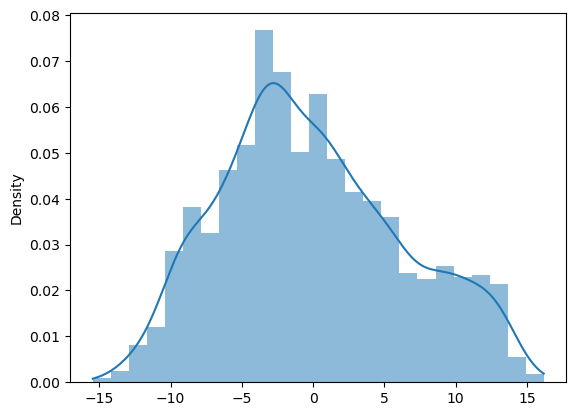

In [517]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

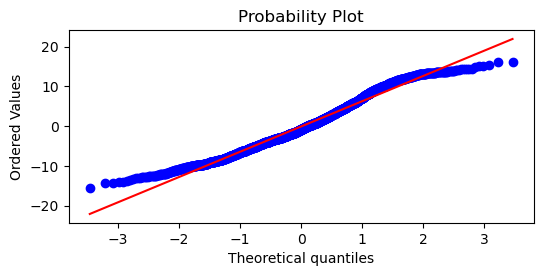

In [518]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [519]:
np.mean(residual)

-0.0478750054958377

# –ì–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å 
–ì–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –æ—à–∏–±–æ–∫ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ —Ä–∞–∑–±—Ä–æ—Å –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø—Ä–∏ –ª—é–±—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã –ø–æ –∫–∞–∫–∏–º-—Ç–æ –µ–µ –ø—Ä–∏–∑–Ω–∞–∫–∞–º. –ï—Å–ª–∏ –¥–ª—è –∫–≤–∞—Ä—Ç–∏—Ä –ø–ª–æ—â–∞–¥—å—é 30-50 –º–µ—Ç—Ä–æ–≤ —Ä–∞–∑–±—Ä–æ—Å –æ—à–∏–±–æ–∫ –±—É–¥–µ—Ç –º–∞–ª–µ–Ω—å–∫–∏–π, –∞ –¥–ª—è –∫–≤–∞—Ä—Ç–∏—Ä, –ø–ª–æ—â–∞–¥—å—é 50-70 –º–µ—Ç—Ä–æ–≤ —Ä–∞–∑–±—Ä–æ—Å –æ—à–∏–±–æ–∫ –±—É–¥–µ—Ç –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π, —Ç–æ –º—ã –±—É–¥–µ–º –∏–º–µ—Ç—å –¥–µ–ª–æ —Å –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å—é. –¢–∞–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –Ω–∞—Å –Ω–µ —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç. –ù–∞–º –≤–∞–∂–Ω–æ, —á—Ç–æ–±—ã –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –±—ã–ª–æ –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ –ø—Ä–∏ –ª—é–±—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

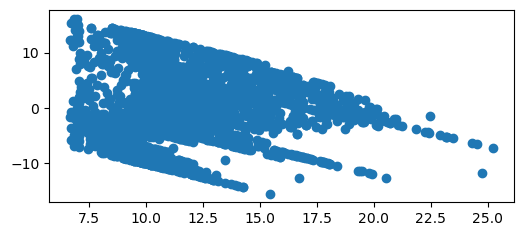

In [520]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ (–æ—à–∏–±–æ–∫) –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –≤ —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –µ—Å—Ç—å –ª–∏–Ω–µ–π–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É –æ—Å—Ç–∞—Ç–∫–∞–º–∏ –¥–ª—è –æ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ –∏ –æ—Å—Ç–∞—Ç–∫–∞–º–∏ –¥–ª—è –¥—Ä—É–≥–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤. –¢–∞–∫–æ–µ –º–æ–∂–µ—Ç –ø—Ä–æ—è–≤–ª—è—Ç—å—Å—è –≤ —Å–∏–ª—É –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏—á–∏–Ω, –∫–∞–∫ –∏ –≤ —Å–ª—É—á–∞–µ —Å—Å –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å—é. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –∫–∞–∫–∏–µ-—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–ª—è —Å–æ—Å–µ–¥–Ω–∏—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ —Å—Ç—Ä–∞–Ω—ã, —Ç–æ, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –æ–Ω–∏ –±—É–¥—É—Ç —Å–∏–ª—å–Ω–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω—ã –ø—Ä–æ—Å—Ç–æ –≤ —Å–∏–ª—É —Å—Ö–æ–∂–µ—Å—Ç–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ —ç—Ç–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤.

–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤–ª–µ—á–µ—Ç –∑–∞ —Å–æ–±–æ–π –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏ –ø–æ–ª—É—á–∞—é—Ç—Å—è –Ω–µ—Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—ã–º–∏, –∏ –º—ã –Ω–µ –º–æ–∂–µ–º —Å—Ç—Ä–æ–∏—Ç—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –∏ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –≥–∏–ø–æ—Ç–µ–∑—ã –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

C:\Users\–ü—Ä–æ—Å—Ç–æ –ö–∞—Ç—è\AppData\Local\Temp\ipykernel_24460\4162568235.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


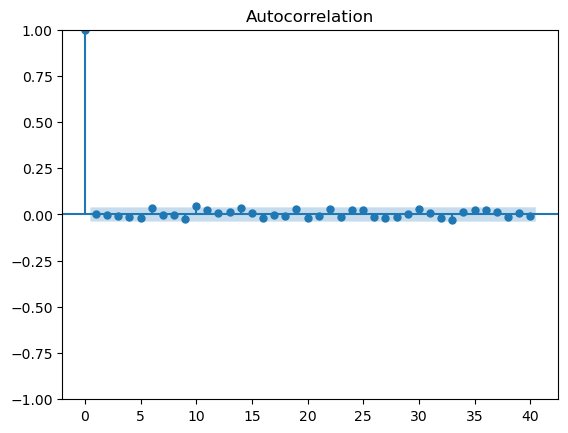

In [521]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()


## –ú–∞—Ç—Ä–∏—Ü–∞–º–∏ 

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [522]:
X = sm.add_constant(X_train)

YM = np.matrix(y_train).transpose()
XM = np.matrix(X)
XT = XM.transpose()
XMT = XT.dot(XM)
TMX = np.linalg.inv(XMT)
a = TMX.dot(XT)
b = a.dot(YM)
print(b)


[[ 7.08891563e+00]
 [-1.16891036e-03]
 [ 4.75688465e-03]
 [ 3.66815149e-01]
 [ 4.71542308e-01]
 [ 5.95159349e-01]
 [ 6.43716538e-01]]


## –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–º —Å–ø—É—Å–∫–æ–º  

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–ª—É—á–∞–π–Ω—É—é —Ç–æ—á–∫—É (—á–∞—Å—Ç–æ –±–µ—Ä—É—Ç –ø—Ä–æ—Å—Ç–æ –Ω—É–ª–∏):

$$
\beta_0 = (0\;\; 0 ...)
$$

–ò—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ —Å–∫–∞—á–µ–º –ø–æ –ª–∏–Ω–∏—è–º —É—Ä–æ–≤–Ω—è –Ω–∞—à–µ–π —Ñ—É–Ω–∫—Ü–∏–∏, —à–∞–≥–∞—è –∫–∞–∂–¥—ã–π —Ä–∞–∑ –≤ —Å—Ç–æ—Ä–æ–Ω—É –∞–Ω—Ç–∏–≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ —Å –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–æ–π —à–∞–≥–∞ $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
–û—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º—Å—è, –∫–æ–≥–¥–∞ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Å—Ç–∞–Ω–æ–≤–∞. –ù–∞–ø—Ä–∏–º–µ—Ä:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

–ü—É—Å—Ç—å –∏–º–µ–µ–º 3 –æ–±—ä–µ–∫—Ç–∞ $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ —Å 3 –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ $d_1$, $d_2$ (+ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞). –•–æ—Ç–∏–º –æ—Ü–µ–Ω–∏—Ç—å –æ–±—ã—á–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

–¢–æ–≥–¥–∞ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –æ—à–∏–±–∫–∏ –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–µ –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

–ü–æ—Å—á–∏—Ç–∞–µ–º –≤–µ–∫—Ç–æ—Ä-–≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ –≤—Å–µ–º –æ—Ü–µ–Ω–∏–≤–∞–µ–º—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

–ü—Ä–∏–º–µ—Ä —Ä–∞—Å—á–µ—Ç–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—É —É –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–æ–º–µ—Ä 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [525]:
np.random.seed(42) # –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
ùõΩ = np.random.rand(X_train.shape[1])
# –î–∞–ª–µ–µ —Ä–µ–∞–ª–∏–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –≤—ã–ø–æ–ª–Ω—è—Ç—å –æ–¥–Ω—É –∏—Ç–µ—Ä–∞—Ü–∏—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞:

def gradient_descent_step(X, y, ùõΩ, learning_rate):
    gradient = 2 * X.T @ (X @ ùõΩ - y.T) / len(y)
    new_ùõΩ = ùõΩ - learning_rate * gradient
    return new_ùõΩ

# –ó–¥–µ—Å—å X - –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç–æ–≤-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤, y - –≤–µ–∫—Ç–æ—Ä —Ü–µ–ª–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, ùõΩ - –≤–µ–∫—Ç–æ—Ä –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, learning_rate - —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä–∞—è –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ä–∞–∑–º–µ—Ä —à–∞–≥–∞ –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏.
# –¢–µ–ø–µ—Ä—å —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ gradient_descent_step –º–æ–∂–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –ø–æ–ª–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞:

def gradient_descent(X, y, learning_rate, num_iterations):
    np.random.seed(42)
    ùõΩ = np.random.rand(X.shape[1])
    for i in range(num_iterations):
        ùõΩ = gradient_descent_step(X, y, ùõΩ, learning_rate)
        return ùõΩ
# –ó–¥–µ—Å—å X - –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç–æ–≤-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤, y - –≤–µ–∫—Ç–æ—Ä —Ü–µ–ª–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, learning_rate - —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, num_iterations - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –∞–ª–≥–æ—Ä–∏—Ç–º–∞.
# –¢–∞–∫–∂–µ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö:

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
print(gradient_descent(X_train, y_train, 0.01,1000))

Date                       -2765.251721
Rented Bike Count         -18238.729073
Solar Radiation (MJ/m2)      -10.570180
Rainfall(mm)                   0.140387
Snowfall (cm)                 -0.215399
Seasons                      -18.065318
dtype: float64


In [524]:
print(np.matrix(X_train).shape)
print(np.matrix(y_train).shape)

(6132, 6)
(1, 6132)


# –ó–∞–¥–∞–Ω–∏–µ
1. –í—ã–±—Ä–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç https://archive-beta.ics.uci.edu/.
2. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é statsmodels (—à–∞–≥–∏ –≤—ã—à–µ).
3. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –æ–±—Ä–∞—Ç–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã. 
4. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç–æ–¥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ (–∏—Å–ø–æ–ª—å–∑—É—è –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã–µ —Ñ–æ—Ä–º—É–ª—ã). –°—Ä–∞–≤–Ω–∏—Ç—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ sklearn.
4. –°—Ä–∞–≤–Ω–∏—Ç—å –∏ –æ–ø–∏—Å–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.


# –ü–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞–º
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. –ï—â–µ –∫–∞–∫–∏—Ö-—Ç–æ —Ö–æ—Ä–æ—à–∏—Ö –ª—é–¥–µ–π